In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]
from math import sqrt
import imageio
import numpy as np
from skimage.draw import polygon
from skimage import data, img_as_float
from skimage.feature import blob_log,peak_local_max
from skimage.color import rgb2gray, label2rgb
from skimage.measure import label, regionprops,find_contours
from skimage.morphology import binary_closing
from skimage.filters import gaussian, threshold_otsu, threshold_multiotsu, difference_of_gaussians
from skimage.segmentation import active_contour, watershed
from scipy import ndimage as ndi

# IMAGE

In [10]:
#############
# IMAGE
#############
img_stars = data.hubble_deep_field()[0:500, 0:500]
stars_gray = rgb2gray(img_stars)
rows_img = stars_gray.shape[0]
columns_img = stars_gray.shape[1]

# plt.imshow(stars_gray, cmap=plt.cm.gray)
# plt.axis('off')

# FIND CONTOURS

Number of contours counted :  1247


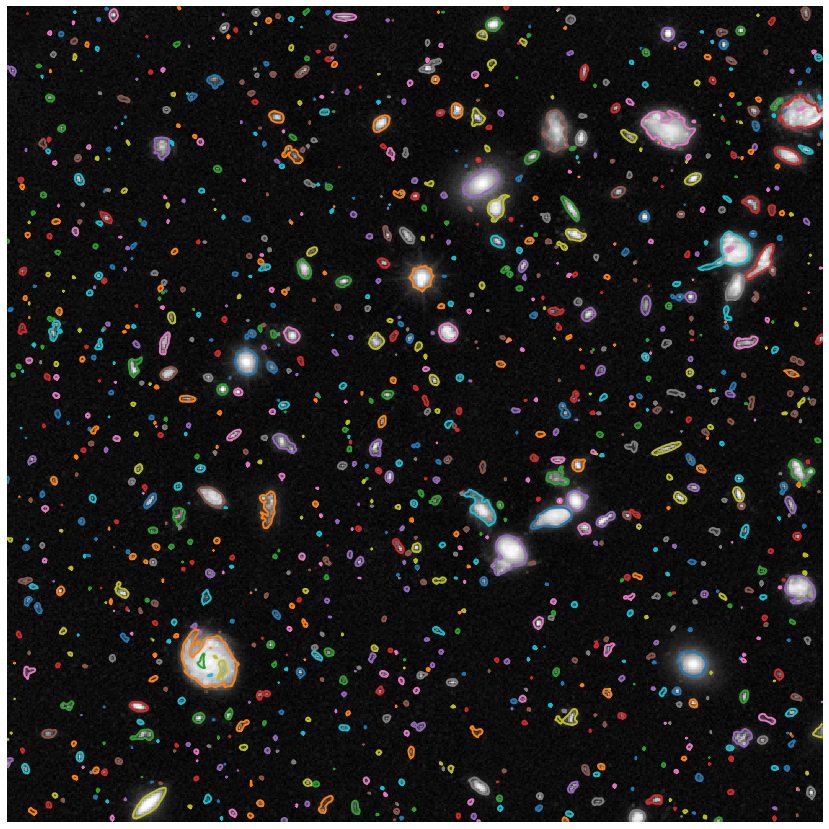

In [21]:

# FILTERING IMAGE 
stars_filtered = difference_of_gaussians(stars_gray, low_sigma = 0.5, high_sigma=5)

# fig_filtered, ax_filtered = plt.subplots()
# ax_filtered.imshow(stars_filtered, cmap=plt.cm.gray)
# plt.axis('off')

# MASK FOR CLIP
mask = np.zeros_like(stars_gray)

# FIND CONTOUR LEVELS
contours = find_contours(stars_filtered,level = 0.05)

fig_c, ax_c = plt.subplots()
ax_c.imshow(stars_gray, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax_c.plot(contour[:, 1], contour[:, 0], linewidth=2)
    mask[np.round(contour[:, 0]).astype('int'), np.round(contour[:, 1]).astype('int')] = 1

plt.axis('off')

print("Number of contours counted : " ,len(contours))

# FILLING CONTOURS ONLY

(-0.5, 499.5, 499.5, -0.5)

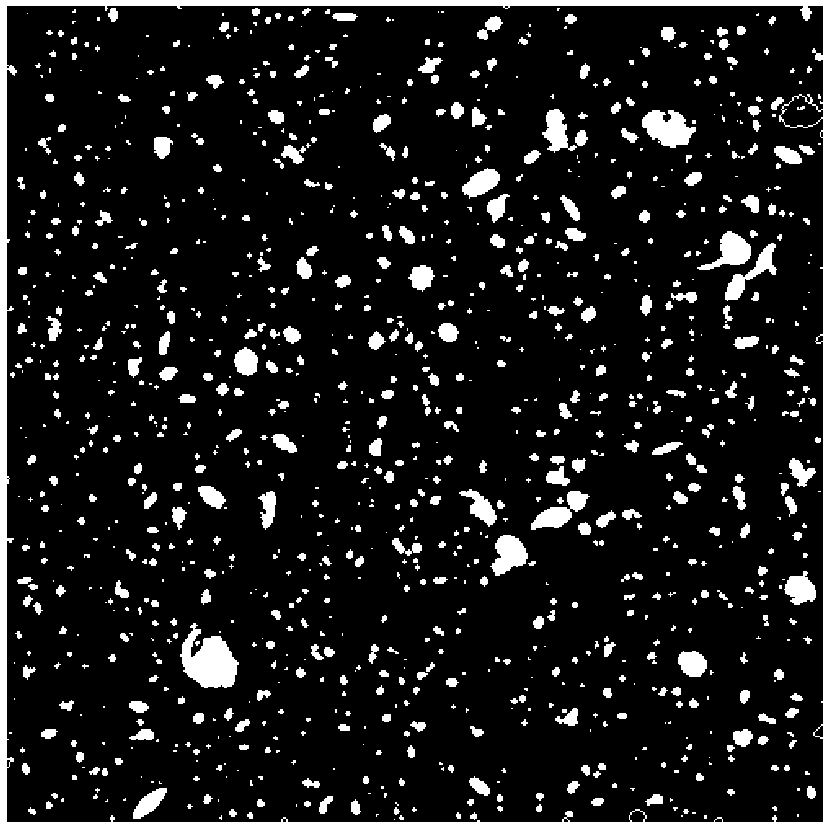

In [22]:
# mask = ndi.binary_closing(mask)
mask = ndi.binary_fill_holes(mask)
mask_inv = ~mask
fig, ax = plt.subplots()
ax.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')

In [13]:
      
clipped_stars = np.copy(stars_gray)
clipped_stars[mask_inv] = 0

label_mask = label(mask,connectivity=1)
regions = regionprops(label_mask, clipped_stars)
print('Number of regions: {}'.format(len(regions)))


# fig, ax = plt.subplots()
# ax.imshow(clipped_stars, cmap=plt.cm.gray)
# plt.axis('off')


Number of regions: 1144


(-0.5, 499.5, 499.5, -0.5)

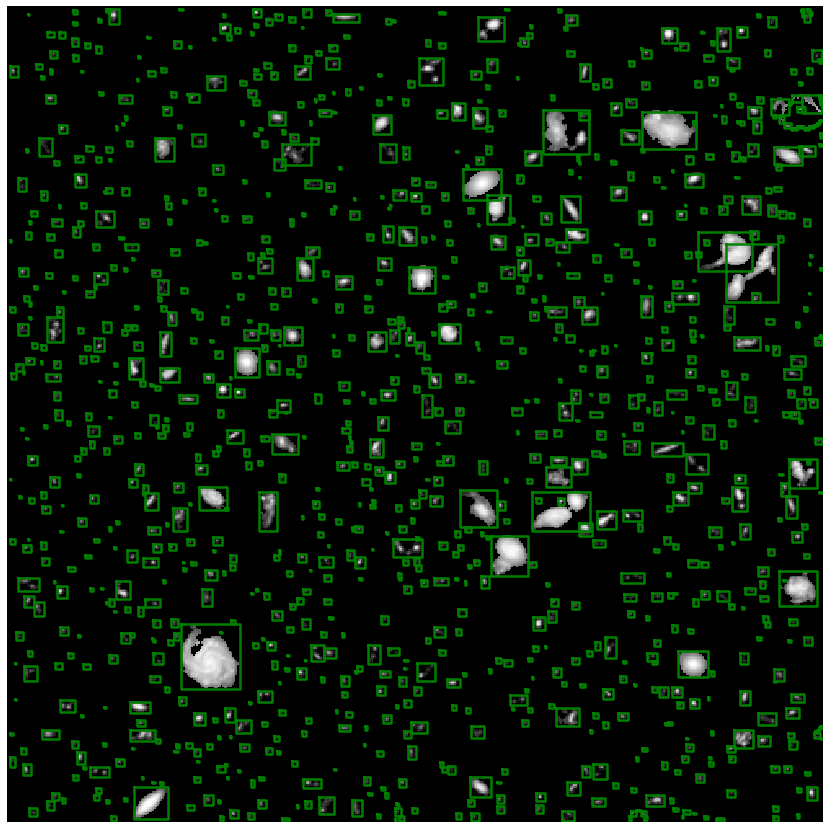

In [14]:
fig_label, ax_label = plt.subplots(1,1)
plt.imshow(clipped_stars, cmap = plt.cm.gray)


for props in regions:
    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax_label.plot(bx, by, '-g', linewidth=2.5)
plt.axis('off')

# USING POLYGON

(-0.5, 499.5, 499.5, -0.5)

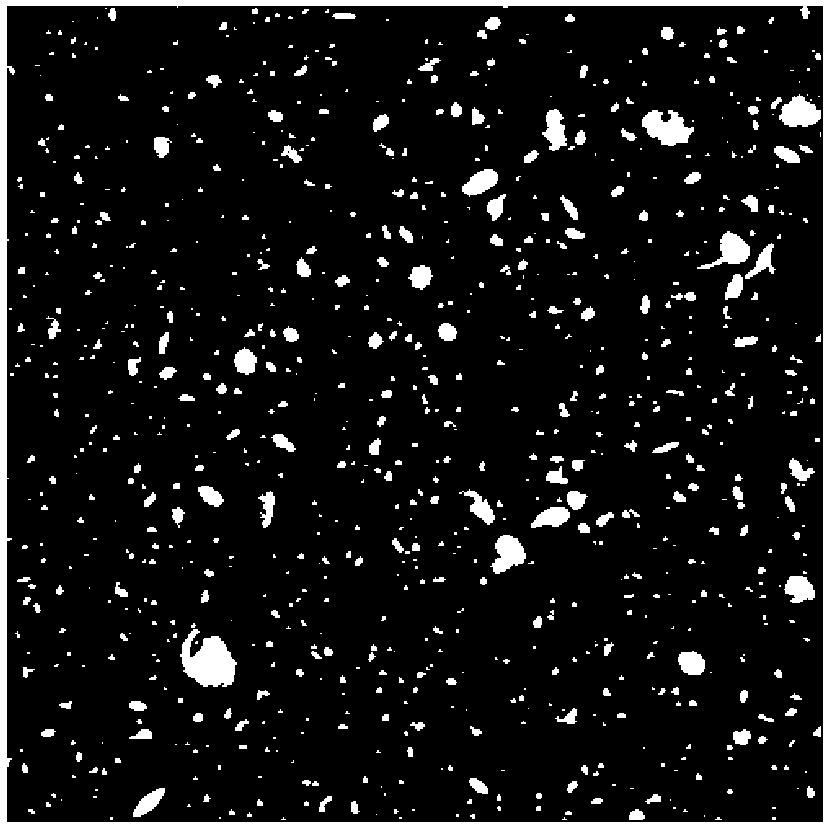

In [15]:
# MASK FOR CLIP
mask_pol = np.zeros_like(stars_gray, dtype=bool)

for n, contour in enumerate(contours):
    rp, cp = polygon(np.round(contour[:, 0]).astype('int'), np.round(contour[:, 1]).astype('int'))
    mask_pol[rp, cp] = 1
    
fig_pol, ax_pol = plt.subplots()
ax_pol.imshow(mask_pol, cmap=plt.cm.gray)
plt.axis('off')
    


In [16]:
mask_ipol = ~mask_pol
clipped_stars_pol = np.copy(stars_gray)
clipped_stars_pol[mask_ipol] = 0

label_img_pol = label(mask_pol, connectivity=1)
regions_pol = regionprops(label_img_pol,clipped_stars_pol)
print('Number of polygon regions:{}'.format(len(regions_pol)))


# fig_cpol, ax_cpol = plt.subplots()
# ax_cpol.imshow(clipped_stars_pol, cmap=plt.cm.gray)
# plt.axis('off')

Number of polygon regions:913


(-0.5, 499.5, 499.5, -0.5)

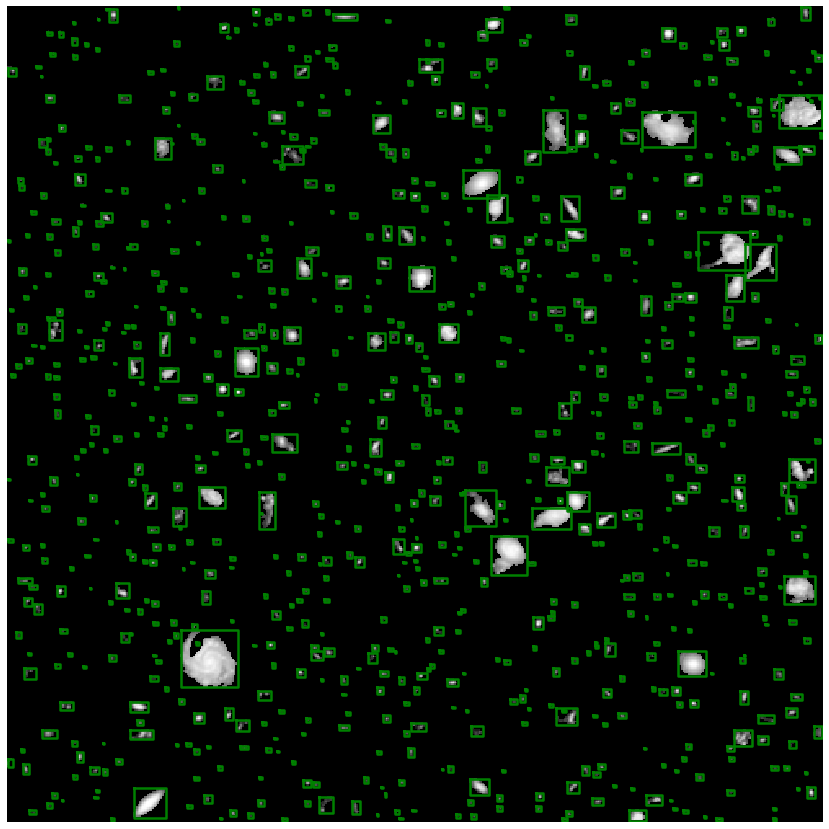

In [17]:
fig_label, ax_label = plt.subplots(1,1)
plt.imshow(clipped_stars_pol, cmap = plt.cm.gray)

for props in regions_pol:
    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax_label.plot(bx, by, '-g', linewidth=2.5)
plt.axis('off')

# REGION PROPERTIES

(array([  1.,   0.,   0.,   2.,   9.,  52., 106., 149., 144., 117.,  80.,
         46.,  44.,  35.,  32.,  23.,  15.,  25.,  15.,  21.,  15.,   8.,
          7.,  10.,  10.,   5.,   7.,  11.,   8.,   8.,   4.,   4.,   5.,
          9.,   2.,   7.,   3.,   7.,   5.,   2.,   1.,   3.,   5.,   4.,
          2.,   3.,   1.,   4.,   1.,   1.,   4.,   5.,   2.,   1.,   1.,
          0.,   1.,   4.,   3.,   1.,   4.,   2.,   3.,   3.,   0.,   0.,
          2.,   1.,   2.,   3.,   1.,   0.,   1.,   0.,   1.,   0.,   1.,
          0.,   2.,   0.,   1.,   1.,   0.,   1.,   0.,   2.,   2.,   0.,
          0.,   2.,   1.,   1.,   1.,   0.,   2.,   2.,   1.,   0.,   0.,
          1.]),
 array([0.07645137, 0.08270746, 0.08896355, 0.09521964, 0.10147573,
        0.10773182, 0.1139879 , 0.12024399, 0.12650008, 0.13275617,
        0.13901226, 0.14526835, 0.15152444, 0.15778053, 0.16403661,
        0.1702927 , 0.17654879, 0.18280488, 0.18906097, 0.19531706,
        0.20157315, 0.20782924, 0.21408532, 0.

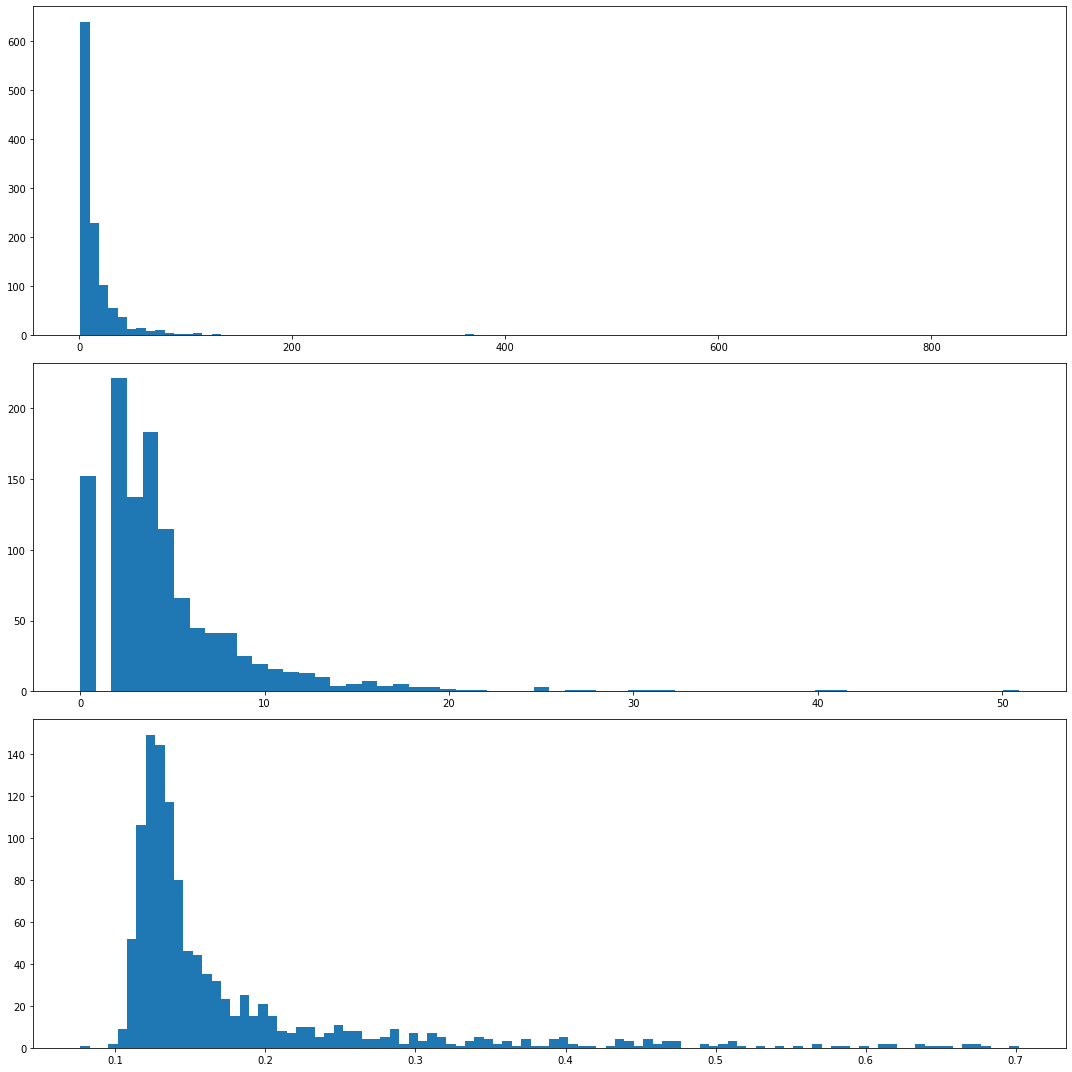

In [18]:
#From filled contours

areas = np.array([prop.area for prop in regions])
major_length = np.array([prop.major_axis_length for prop in regions])
mean_int = np.array([prop.mean_intensity for prop in regions])

fig, axs = plt.subplots(3,1,tight_layout=True)
axs[0].hist(areas, bins=100)
axs[1].hist(major_length, bins=60)
axs[2].hist(mean_int, bins=100)

(array([ 2.,  2.,  1.,  5.,  9., 16., 29., 57., 49., 66., 49., 41., 47.,
        40., 38., 35., 35., 17., 23., 19., 26., 25., 17., 20., 13., 13.,
         9., 16.,  7.,  7.,  8.,  7.,  8.,  6.,  8.,  7.,  8.,  2.,  4.,
        10.,  6.,  6.,  2.,  5.,  5.,  3.,  7.,  4.,  3.,  4.,  1.,  4.,
         3.,  3.,  0.,  5.,  4.,  0.,  2.,  0.,  1.,  0.,  1.,  3.,  1.,
         1.,  1.,  1.,  3.,  4.,  1.,  1.,  0.,  1.,  2.,  1.,  0.,  1.,
         1.,  0.,  1.,  0.,  0.,  1.,  0.,  2.,  1.,  2.,  0.,  2.,  4.,
         0.,  1.,  1.,  0.,  2.,  2.,  0.,  1.,  1.]),
 array([0.08126667, 0.08777689, 0.0942871 , 0.10079732, 0.10730754,
        0.11381776, 0.12032798, 0.1268382 , 0.13334842, 0.13985864,
        0.14636886, 0.15287907, 0.15938929, 0.16589951, 0.17240973,
        0.17891995, 0.18543017, 0.19194039, 0.19845061, 0.20496083,
        0.21147104, 0.21798126, 0.22449148, 0.2310017 , 0.23751192,
        0.24402214, 0.25053236, 0.25704258, 0.2635528 , 0.27006301,
        0.27657323, 0.2830

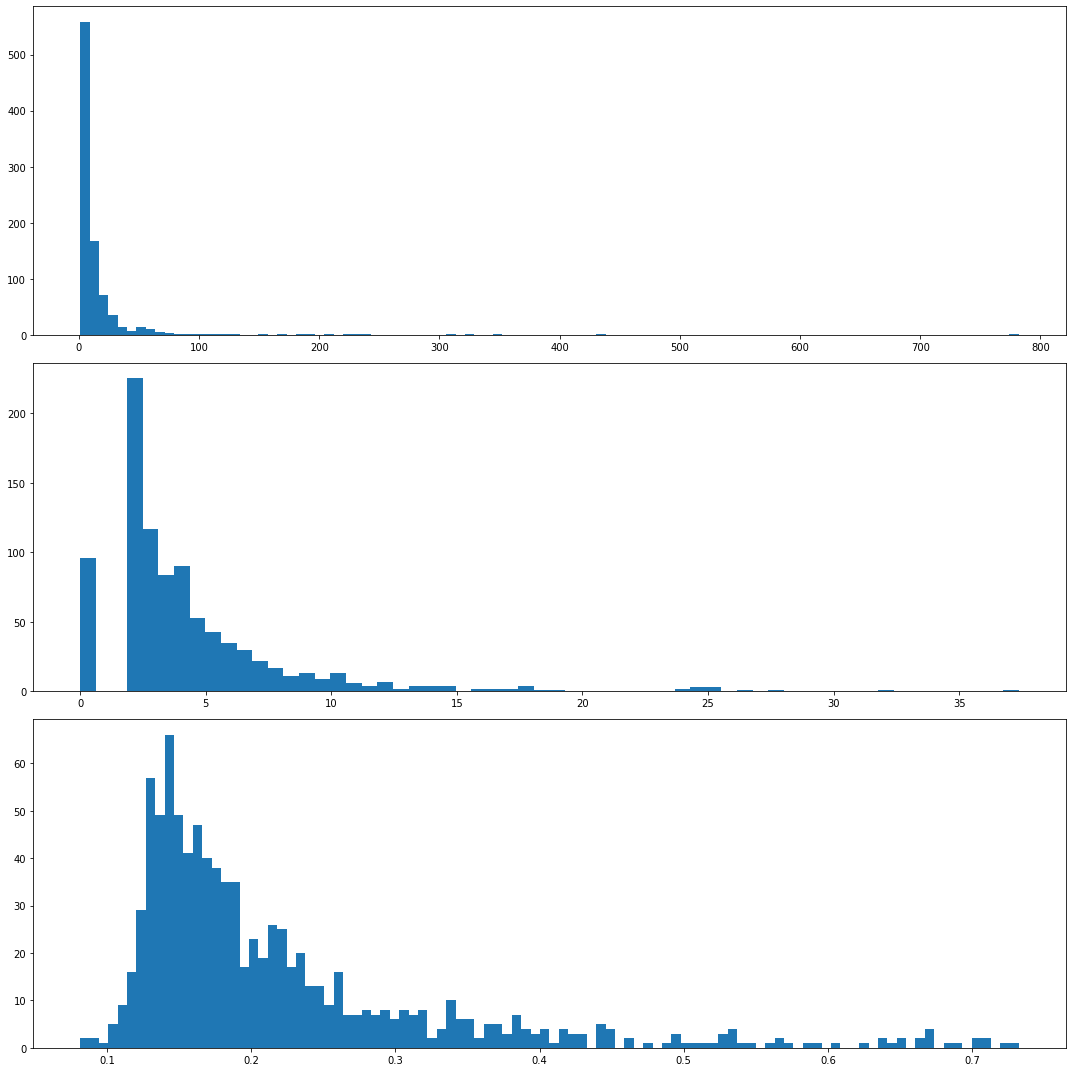

In [19]:
#From polygons

areas_pol = np.array([prop_pol.area for prop_pol in regions_pol])
major_length_pol = np.array([prop_pol.major_axis_length for prop_pol in regions_pol])
mean_int_pol = np.array([prop_pol.mean_intensity for prop_pol in regions_pol])

fig, axs = plt.subplots(3,1,tight_layout=True)
axs[0].hist(areas_pol, bins=100)
axs[1].hist(major_length_pol, bins=60)
axs[2].hist(mean_int_pol, bins=100)

In [23]:
def funcion(**kwargs):
    print(kwargs)
    
funcion(a=3, b=4)

{'a': 3, 'b': 4}


# Thoughts

This time was just extracting objects to find properties

- Obviously depends on applications and details to highlight (including size and shape).
- Features to extract have clear boundaries? Also adapt filter to this.
- Are regions on the image border important?
- Definition between two very closed onjects.
- skimage.measure.regionprops Cool to use.

Other things to do with the image (next): 

- Flatten (e.g. https://stackoverflow.com/questions/2477774/correcting-fisheye-distortion-programmatically https://dsp.stackexchange.com/questions/2406/how-to-flatten-the-image-of-a-label-on-a-food-jar  <-- Cool).
- Filter noise, adjust light/colors.
- Registration?